Import modules

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

Load Data

In [2]:
data = fetch_california_housing(as_frame=True)
print(data.DESCR)   # print the description of the dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Checking the data about and preprocess if required

In [3]:
df = data.frame
display(df.head())
display(df.dtypes)
print("The dimension of the data is",df.shape)
print("Response variable is: ",data.target_names[0])
print("Predictor variables are:\n",data.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

The dimension of the data is (20640, 9)
Response variable is:  MedHouseVal
Predictor variables are:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Define X and y and split the data

In [4]:
# taken 1000 data points by random sampling for ease in computational efficiency
df = df.sample(n=1000, random_state=0)
df.shape

(1000, 9)

In [5]:
X = df[data.feature_names]
y = df[data.target_names[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (800, 8)
Test set size: (200, 8)


In [6]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20138,2.6991,50.0,4.809339,1.097276,1079.0,4.198444,34.40,-119.05
18822,2.0650,26.0,10.583333,2.055556,498.0,2.305556,39.52,-120.51
15081,2.8175,22.0,4.330964,1.025381,2766.0,2.808122,32.81,-116.94
19925,4.3816,35.0,6.126984,1.023810,849.0,2.246032,36.32,-119.32
13210,4.0096,5.0,5.061294,1.017026,2028.0,2.301930,34.04,-117.69


### Fully Grown Tree

In [7]:
regtree = DecisionTreeRegressor(random_state=0)
regtree.fit(X_train, y_train)

print("MSE========================")
print("Training MSE:", mean_squared_error(y_train, regtree.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, regtree.predict(X_test)))

print("\nR2========================")
print("Training R2:", r2_score(y_train, regtree.predict(X_train)))
print("Test R2:", r2_score(y_test, regtree.predict(X_test)))

print('\nTree depth:', regtree.tree_.max_depth)
print('Tree node count:', regtree.tree_.node_count)

MSE========================
Training MSE: 6.310887241768095e-32
Test MSE: 0.8103146711030002

R2========================
Training R2: 1.0
Test R2: 0.40749181069191365

Tree depth: 21
Tree node count: 1543


Plot tree(optional)

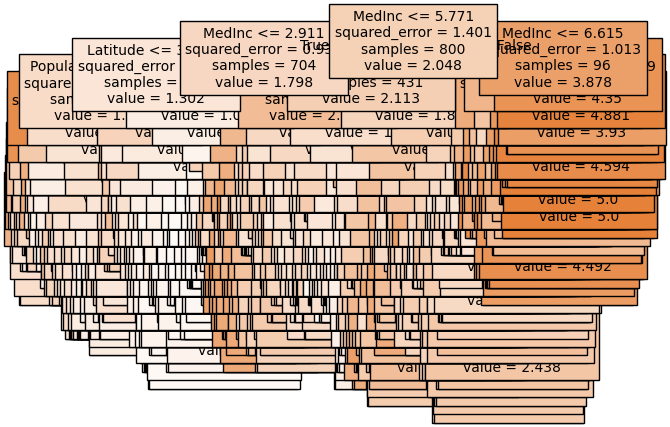

In [8]:
plt.Figure(figsize=(20, 10))
plot_tree(regtree, feature_names=data.feature_names, filled=True, fontsize=10)
plt.show()

Cost complexcity prunning

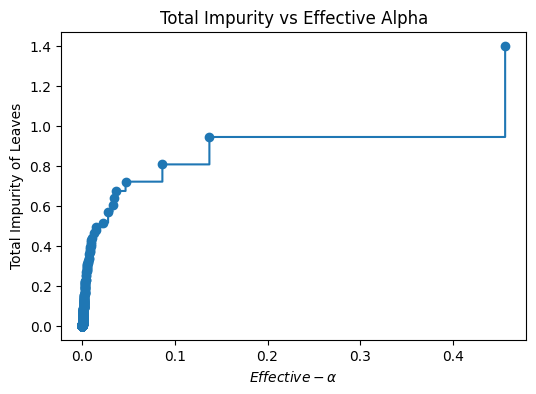

In [9]:
path = regtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel(r'$Effective-\alpha$')
plt.ylabel('Total Impurity of Leaves')
plt.title('Total Impurity vs Effective Alpha')
plt.show()

In [10]:
# # Remove the last tree (only root), not useful for accuracy
# ccp_alphas = np.unique(ccp_alphas)[:-1]
# print("Total number of unique alpha values: ",len(ccp_alphas))

# cv_mse = []
# cv_r2 = []

# for alpha in ccp_alphas:
#    regtree = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
#    mse = -cross_val_score(regtree, X_train, y_train,\
#        cv=KFold(5, shuffle=True, random_state=0), scoring='neg_mean_squared_error').mean()
#    cv_mse.append(mse)
#    r2 = cross_val_score(regtree, X_train, y_train,\
#        cv=KFold(5, shuffle=True, random_state=0), scoring='r2').mean()
#    cv_r2.append(mse)


In [13]:
# Remove the last tree (only root), not useful for accuracy
ccp_alphas = np.unique(ccp_alphas)[:-1]
print("Total number of unique alpha values: ",len(ccp_alphas))

cv_mse = []
cv_r2 = []

for alpha in ccp_alphas:
   regtree = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
   scores = cross_validate(regtree, X_train, y_train,\
                           cv = KFold(5, shuffle=True, random_state=0),\
                              scoring=['neg_mean_squared_error', 'r2'],\
                                 n_jobs=None)
   cv_mse.append(-np.mean(scores['test_neg_mean_squared_error']))
   cv_r2.append(np.mean(scores['test_r2']))

Total number of unique alpha values:  711


In [14]:
# Choose best alpha
best_alpha_mse = ccp_alphas[np.argmin(cv_mse)]
print("Best alpha:", best_alpha_mse)
print("Minimum CV_MSE:", np.min(cv_mse))

best_alpha_r2 = ccp_alphas[np.argmax(cv_r2)]
print("\nBest alpha:", best_alpha_r2)
print("Maximum R2:", np.max(cv_r2))

if best_alpha_mse == best_alpha_r2:
    print("\nBest alpha for MSE and R2 is the same:", best_alpha_mse)
    best_alpha = best_alpha_mse
else:
    print("\nBest alpha for MSE and R2 is different. Choose the one that fits your needs.")

Best alpha: 0.01278710155440857
Minimum CV_MSE: 0.6486230207979279

Best alpha: 0.01278710155440857
Maximum R2: 0.5239557971785835

Best alpha for MSE and R2 is the same: 0.01278710155440857


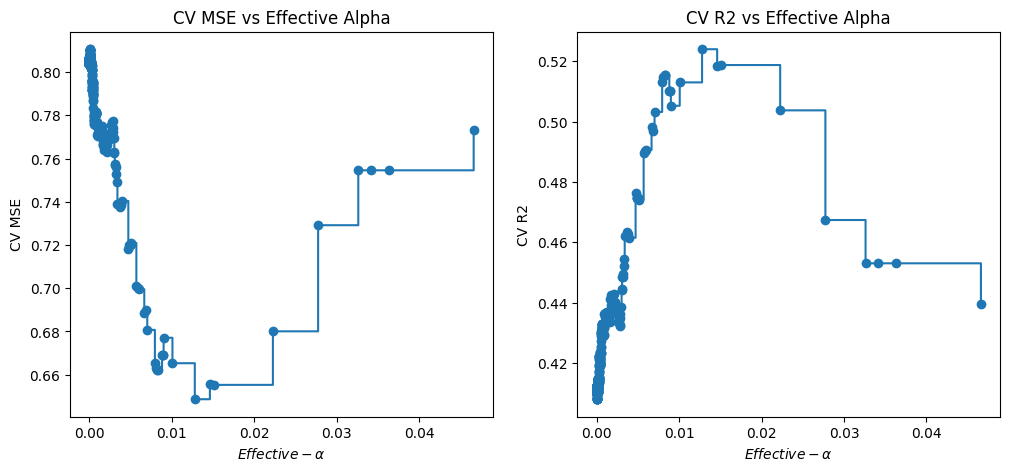

In [15]:
figure, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(ccp_alphas, cv_mse, marker='o', drawstyle='steps-post')
ax[0].set_xlabel(r'$Effective-\alpha$')
ax[0].set_ylabel('CV MSE')
ax[0].set_title('CV MSE vs Effective Alpha')

ax[1].plot(ccp_alphas, cv_r2, marker='o', drawstyle='steps-post')
ax[1].set_xlabel(r'$Effective-\alpha$')
ax[1].set_ylabel('CV R2')
ax[1].set_title('CV R2 vs Effective Alpha')
plt.show()

### Pruned Tree

In [16]:
pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

print("Pruned Tree ========================")
print("Training MSE:", mean_squared_error(y_train, pruned_tree.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, pruned_tree.predict(X_test)))
print("Training R2:", r2_score(y_train, pruned_tree.predict(X_train)))
print("Test R2:", r2_score(y_test, pruned_tree.predict(X_test)))
print('Tree depth:', pruned_tree.tree_.max_depth)
print('Tree node count:', pruned_tree.tree_.node_count)

Pruned Tree ========================
Training MSE: 0.4636714314230093
Test MSE: 0.6960502684562002
Training R2: 0.6690777120484872
Test R2: 0.4910428023362693
Tree depth: 6
Tree node count: 25


Nodes and depth vs alpha

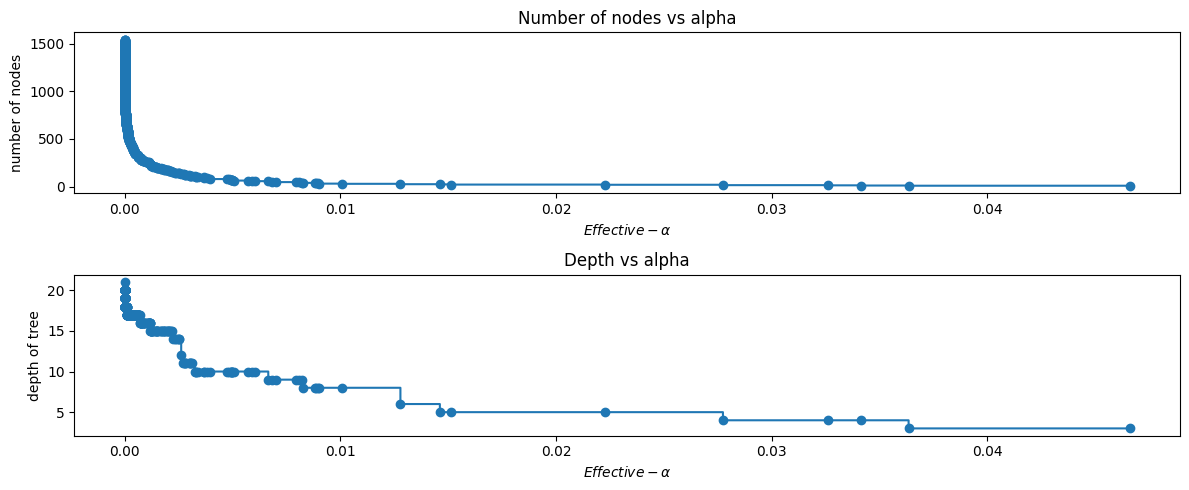

In [17]:
clfs = []
for alpha in ccp_alphas:
    regtree = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    regtree.fit(X_train, y_train)
    clfs.append(regtree)

node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel(r'$Effective-\alpha$')
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depths, marker="o", drawstyle="steps-post")
ax[1].set_xlabel(r'$Effective-\alpha$')
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

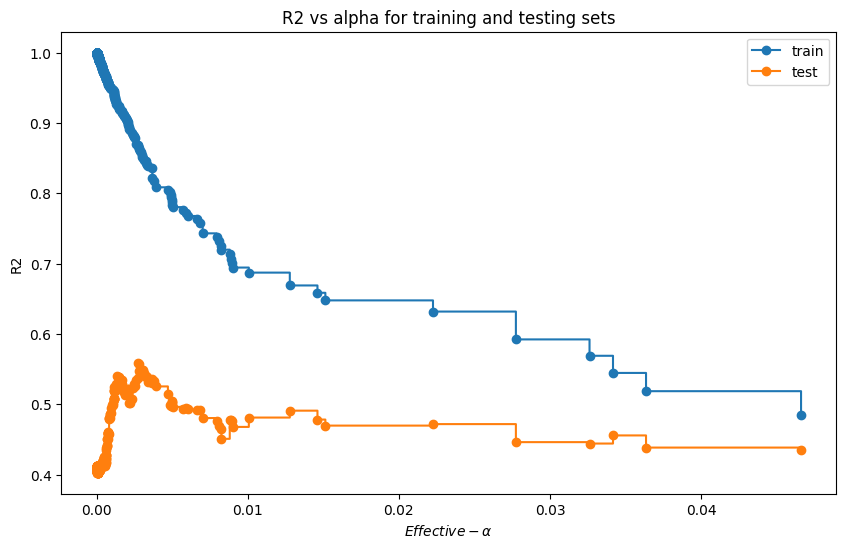

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel(r'$Effective-\alpha$')
ax.set_ylabel("R2")
ax.set_title("R2 vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Store as dataframe

In [19]:
cv_data = pd.DataFrame({
      'alpha': ccp_alphas,
      'cv_mse': cv_mse,
      'cv_r2': cv_r2,
      'node_count': node_counts,
      'depth': depths,
      'train_score': train_scores,
      'test_score': test_scores
})
print(cv_data.head())
#pd.save_csv(cv_data, 'regtree_california_housing_cv_data.csv', index=False)

          alpha    cv_mse     cv_r2  node_count  depth  train_score  \
0  0.000000e+00  0.803965  0.412381        1543     21          1.0   
1  4.440892e-18  0.803965  0.412381        1541     20          1.0   
2  6.661338e-18  0.803965  0.412381        1539     20          1.0   
3  8.881784e-18  0.803965  0.412381        1537     20          1.0   
4  2.516506e-17  0.803965  0.412381        1531     20          1.0   

   test_score  
0    0.407492  
1    0.407492  
2    0.407492  
3    0.407492  
4    0.407492  


### Linear regression

In [20]:
from statsmodels.api import OLS

In [21]:
model = OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              819.6
Date:                Tue, 19 Aug 2025   Prob (F-statistic):                        0.00
Time:                        12:00:07   Log-Likelihood:                         -932.82
No. Observations:                 800   AIC:                                      1882.
Df Residuals:                     792   BIC:                                      1919.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------